Импортируем необходимые пакеты пайтон для дальнейшего анализа

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Открываем csv-file

In [21]:
titanic_data = pd.read_csv('titanic.csv')

Далее выпускаем всю необходимую информацию о данных для дальнейшей работы

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#Здесь можно увидеть что возраст некоторых пассажиров не определен
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
#Название столбцов
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
#количество строк и столбцов
titanic_data.shape

(891, 12)

In [26]:
# ранее выясняли что отсутствует возраст некоторых пассажиров, тут можно увидеть что их число 177
# и у 687 пассажиров не определен номер кабины
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### первое задание по лабке, найти число мужчин и женщин на борту

In [27]:
titanic_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

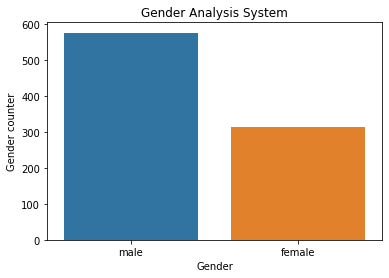

In [28]:
sns.barplot(x = titanic_data.Sex.value_counts().index, y = titanic_data.Sex.value_counts().values)
plt.xlabel('Gender')
plt.ylabel('Gender counter')
plt.title('Gender Analysis System')
plt.show()

### Второе задание найти количество выживших и утонувших из числа пассажиров

In [29]:
titanic_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### так же для различия процентности хотелось бы визуализировать на графике с помощью пакета seaborn

In [30]:
#  но сначала нужно выполнить простой алгоритм
survived = titanic_data[(titanic_data.Survived==1)]
unsurvived = titanic_data[(titanic_data.Survived==0)]
print('survived' , len(survived))
print('unsurvived' , len(unsurvived))

survived 342
unsurvived 549


### Таким образом нарисуем pie chart с процентностью выживших и утонувших с помощью пакета matplotlib

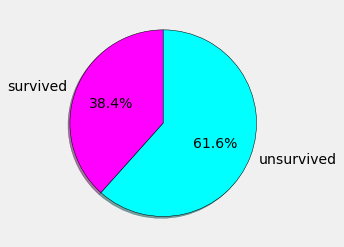

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
slices = [len(survived), len(unsurvived)]
labels = ['survived', 'unsurvived']
colors = ['magenta', 'cyan']
plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'}, colors=colors,
        shadow = True, startangle=90, autopct='%1.1f%%')
plt.show()

### Третье задание найти число пассажиров первого класса

In [32]:
titanic_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Так же хотелось бы визулизировать на pie chart

In [33]:
first_class = titanic_data[(titanic_data.Pclass==1)]
second_class = titanic_data[(titanic_data.Pclass==2)]
third_class = titanic_data[(titanic_data.Pclass==3)]
print('first class passengers' , len(first_class))
print('second class passengers' , len(second_class))
print('third class passengers' , len(third_class))

first class passengers 216
second class passengers 184
third class passengers 491


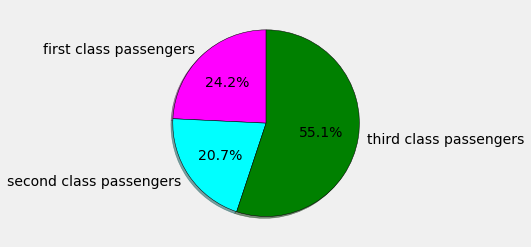

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
slices = [len(first_class), len(second_class), len(third_class)]
labels = ['first class passengers', 'second class passengers', 'third class passengers']
colors = ['magenta', 'cyan', 'green']
plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'}, colors=colors,
        shadow = True, startangle=90, autopct='%1.1f%%')
plt.show()

### Четвертое задание найти возраст пассажиров

In [35]:
titanic_data.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

Тут я нашла максимальный, минимальный и средний арифметический возраст пассажиров 

In [36]:
a = titanic_data.Age.mean()
b = titanic_data.Age.max()
c = titanic_data.Age.min()
print('Average age', a)
print('Maximun age', b)
print('Minimum age', c)

Average age 29.69911764705882
Maximun age 80.0
Minimum age 0.42


Дальше разделила пассажиров на три группы(младшего возраста, среднего возраста и старшего возраста)

In [37]:
young_ages = titanic_data[(titanic_data.Age>=29) & (titanic_data.Age<40)]
middle_ages = titanic_data[(titanic_data.Age>=40) & (titanic_data.Age<50)]
elderly_ages = titanic_data[titanic_data.Age>=50]
print('Young ages' , len(young_ages))
print('Middle ages' , len(middle_ages))
print('Elderly ages' , len(elderly_ages))

Young ages 187
Middle ages 89
Elderly ages 74


таким образом идет визуализация с помошью пакета matplotlib

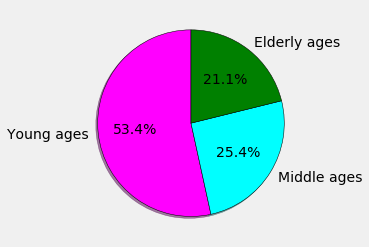

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
slices = [len(young_ages), len(middle_ages), len(elderly_ages)]
labels = ['Young ages', 'Middle ages', 'Elderly ages']
colors = ['magenta', 'cyan', 'green']
plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'}, colors=colors, shadow = True,
         startangle=90, autopct='%1.1f%%')
plt.show()

### Пятое задание найти число братьеd/ сестер и родителей

In [39]:
titanic_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [40]:
titanic_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### пятое задание найти самое знаменитое женское имя на корабле

In [45]:
titanic_data.Name.value_counts()

Seward, Mr. Frederic Kimber                      1
Ford, Miss. Robina Maggie "Ruby"                 1
Quick, Miss. Phyllis May                         1
Elsbury, Mr. William James                       1
Hansen, Mr. Henrik Juul                          1
                                                ..
Hood, Mr. Ambrose Jr                             1
Aks, Mrs. Sam (Leah Rosen)                       1
Quick, Mrs. Frederick Charles (Jane Richards)    1
Reeves, Mr. David                                1
Kink, Mr. Vincenz                                1
Name: Name, Length: 891, dtype: int64

### Тут мы видим что нам нужно разделить Имя от Фамилии

In [49]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
#Таким образом мы разделили имя
titanic_data['Name'] = titanic_data['Name'].str.split().str[0]
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund,",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings,",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen,",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle,",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen,",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila,",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham,",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston,",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr,",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
#Здесь мы видим самые популярные имена на борту, но нам нужно найти популярное женское имя
titanic_data.Name.value_counts()

Andersson,    9
Sage,         7
Goodwin,      6
Skoog,        6
Johnson,      6
             ..
Marvin,       1
Davison,      1
Danoff,       1
Hale,         1
Goncalves,    1
Name: Name, Length: 661, dtype: int64

In [71]:
# Самое популярное женское имя - Andersson
popular_female_name = titanic_data['Sex'] == 'female'
titanic_data.loc[popular_female_name]['Name'].value_counts()

Andersson,        6
Baclini,          4
Lefebre,          3
Ford,             3
Sage,             3
                 ..
O'Brien,          1
Nicola-Yarred,    1
Troutt,           1
Honkanen,         1
Spencer,          1
Name: Name, Length: 258, dtype: int64